In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [272]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews =  pd.read_csv('reviews.csv')

## Motivation
The aim of this project is to find the correlation between the prices of accommodations in Airbnb Seattle and factors such as location, size, amenities offered, and other relevant characteristics. Additionally, it seeks to identify the factors that influence host ratings and their relationship with guest satisfaction.

## Questions

1. What is the correlation between accommodation prices and factors such as location, size, capacity, amenities offered, among others?

2. What are the key factors that influence the review scores given by guests to the listings?

3. What is the expected review score for listings without an assigned score, and how reliable is the estimation?

## Description of the Data Used

This project is based on the following datasets from Airbnb Seattle:
- **Listings**: Contains detailed information about Airbnb properties in Seattle, such as price, location, size, and amenities offered.
- **Calendar**: Provides information about availability and daily prices of Airbnb properties in Seattle.

# Initial exploration 

An initial exploration of the Listings and Calendar datasets from the Airbnb Seattle Dataset will be conducted. The objective is to understand their content, identify the variables they contain, and select the variables relevant to the questions we have posed for further processing and cleaning. This selection will be crucial in order to obtain meaningful and accurate results during data analysis

In [273]:
# Vista inicial
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [274]:
# Columnas y filas
listings.shape

(3818, 92)

In [275]:
# Tipos de datos
listing_type = pd.DataFrame(listings.dtypes)
listing_type

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
name,object
...,...
cancellation_policy,object
require_guest_profile_picture,object
require_guest_phone_verification,object
calculated_host_listings_count,int64


In [276]:
# Valores faltantes por columna
listing_null = pd.DataFrame(listings.isna().sum()).sort_values(0, ascending = False).head(50)
listing_null

,0
license,3818
square_feet,3721
monthly_price,2301
security_deposit,1952
weekly_price,1809
notes,1606
neighborhood_overview,1032
cleaning_fee,1030
transit,934
host_about,859


In [277]:
# Vista inicial
calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [278]:
# Columnas y filas
calendar.shape

(1393570, 4)

In [279]:
# Tipos de datos
calendar_type =  pd.DataFrame(calendar.dtypes)
calendar_type

,0
listing_id,int64
date,object
available,object
price,object


In [280]:
# Valores faltantes por columna
calendar_null = pd.DataFrame(calendar.isna().sum()).sort_values(0, ascending = False).head(50)
calendar_null

,0
price,459028
listing_id,0
date,0
available,0


## Remark 

The exploration begins with a preliminary overview of the datasets, allowing us to understand their content and get an idea of their structure. We examine the sizes of the datasets, data types, and null values. During the initial exploration, we notice that the datasets contain various types of data. However, it is necessary to correct the format for columns representing dates or prices. Additionally, we observe missing values in certain columns: "last_review" has 627 missing values, "neighbourhood" has 416, and "space" has 569 in the Listings dataset. In the Calendar dataset, the "price" column has 459,028 missing values. Now, we proceed to treat the data to achieve a cleaner foundation. Stay tuned for the upcoming steps!

# Cleaning and Data Processing

In this crucial section, we undertake meticulous variable selection closely aligned with our research questions. Our focus lies in correcting the formats of existing variables and creating meaningful new variables, such as semester, density, and price variation by semester. Additionally, we rigorously address missing values by imputing them based on the nature of each variable. This rigorous process ensures a solid and reliable data analysis. Join us as we explore and extract valuable insights from our dataset.

## Variable Selection

Firstly, we identify the variables related to each question, and then we will analyze the data quality of these columns, ensuring their consistency and completeness to obtain the most reliable foundation.

1. Question 1: Correlation between accommodation prices and factors such as location, space size, and offered amenities.

Variables of interest: "price" (accommodation price), "neighbourhood" (neighborhood), "accommodates" (accommodation capacity), "bedrooms" (number of bedrooms), "bathrooms" (number of bathrooms), "amenities" (offered amenities).

2. Question 2: Key factors influencing host ratings and their relationship with guest satisfaction.

Variables of interest: "review_scores_rating" (host rating score), "review_scores_accuracy" (accuracy rating), "review_scores_cleanliness" (cleanliness rating), "review_scores_communication" (communication rating), "review_scores_value" (value rating), "review_scores_location" (location rating).

3. Question 3: Expected review_scores_value for sites without this data recorded.

Variables of interest: All variables involved in questions 1 and 2.


In [281]:
# Correción de los formatos para las variables price, date y transformación de la variable available
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype('float') 
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['available'] = calendar['available'].apply(lambda x: 1 if x == 't'  else 0)

<ipython-input-281-00101cfffa6c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype('float')


In [282]:
# Verificación
calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


### Remark

The creation of the **"semestre"** variable in the analysis of the Airbnb dataset allows for dividing the places into semestral periods, which is beneficial for conducting comparisons and evaluating possible patterns in prices. This variable facilitates data segmentation and understanding, providing valuable information for informed decision-making in the temporary rental market.

In [283]:
# creación de la variable semestre que nos permite identificar en que semestre del año se tiene el registro 
calendar['semestre'] = calendar['date'].apply(lambda x: 1 if x.month <= 6 else 2)

In [284]:
calendar

,listing_id,date,available,price,semestre
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1
...,...,...,...,...,...
1393565,10208623,2016-12-29,0,NaN,2
1393566,10208623,2016-12-30,0,NaN,2
1393567,10208623,2016-12-31,0,NaN,2
1393568,10208623,2017-01-01,0,NaN,1


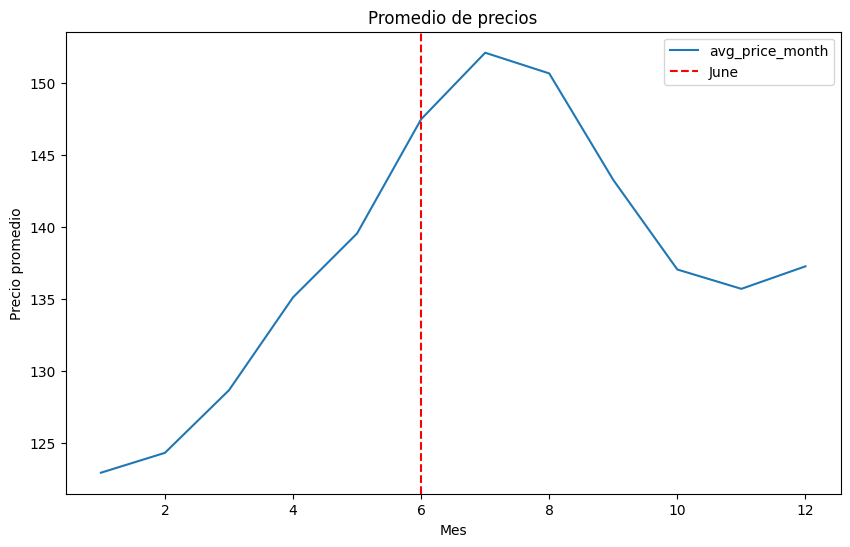

In [285]:
# Calcular el promedio de los precios por semestre
promedio_semestre = calendar.groupby([ calendar['date'].dt.month])['price'].mean().reset_index()

# Crear la gráfica de serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_semestre['date'], promedio_semestre['price'], label='avg_price_month')
plt.axvline(6, color='red', linestyle='--', label = 'June')

plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.title('Promedio de precios')
plt.legend()
plt.show()


### Remark

The analysis of the graph reveals that during the first semester of the year, the average prices show a consistent increasing trend. However, in the second semester, the price behavior is more variable, reaching a peak between July and August, and reaching a minimum between October and November. These findings suggest that the price behavior differs significantly in each semester, highlighting the importance of considering semestral periods when analyzing prices in the Airbnb temporary rental market.

In [286]:
# Divisón de la información por semestre
calendar_sem1 = calendar.query('semestre == 1')
calendar_sem2 = calendar.query('semestre == 2')

In [287]:
print(calendar_sem1.shape, calendar_sem2.shape)

(691058, 5) (702512, 5)


In [288]:
# Resumen de la información por semestre
calendar_agg_sem1 = calendar_sem1.groupby('listing_id').agg({
    'listing_id': 'first',
    'available': ['sum', 'mean'],
    'price': ['min','max','mean']
})

calendar_agg_sem2 = calendar_sem2.groupby('listing_id').agg({
    'listing_id': 'first',
    'available': ['sum', 'mean'],
    'price': ['min','max','mean']
})

In [289]:
calendar_agg_sem1.columns = ['listing_id', 'dias_disponible_sem1', 'porc_disponible_sem1', 'price_min_sem1', 'price_max_sem1', 'price_avg_sem1' ] 
calendar_agg_sem1['variacion_precio_sem1'] = calendar_agg_sem1['price_max_sem1'] - calendar_agg_sem1['price_min_sem1'] 
calendar_agg_sem2.columns = ['listing_id2', 'dias_disponible_sem2', 'porc_disponible_sem2', 'price_min_sem2', 'price_max_sem2', 'price_avg_sem2' ] 
calendar_agg_sem1['variacion_precio_sem2'] = calendar_agg_sem2['price_max_sem2'] - calendar_agg_sem2['price_min_sem2'] 

In [290]:
calendar_agg_sem = calendar_agg_sem1.merge(calendar_agg_sem2, right_on= calendar_agg_sem2['listing_id2'] , left_on = calendar_agg_sem1['listing_id'], how = 'inner')[['listing_id', 'dias_disponible_sem1', 'porc_disponible_sem1',
       'price_min_sem1', 'price_max_sem1', 'price_avg_sem1', 'variacion_precio_sem1' ,'dias_disponible_sem2', 'porc_disponible_sem2', 'price_min_sem2', 'price_max_sem2', 'price_avg_sem2', 'variacion_precio_sem2']]

In [291]:
calendar_agg_sem

,listing_id,dias_disponible_sem1,porc_disponible_sem1,price_min_sem1,price_max_sem1,price_avg_sem1,variacion_precio_sem1,dias_disponible_sem2,porc_disponible_sem2,price_min_sem2,price_max_sem2,price_avg_sem2,variacion_precio_sem2
0,3335,125,0.690608,120.0,120.0,120.000000,0.0,184,1.0,120.0,120.0,120.000000,0.0
1,4291,181,1.000000,82.0,82.0,82.000000,0.0,184,1.0,82.0,82.0,82.000000,0.0
2,5682,125,0.690608,42.0,60.0,55.080000,18.0,184,1.0,48.0,60.0,53.173913,12.0
3,6606,181,1.000000,90.0,100.0,92.762431,10.0,184,1.0,90.0,100.0,92.934783,10.0
4,7369,53,0.292818,85.0,85.0,85.000000,0.0,0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,10332096,181,1.000000,40.0,40.0,40.000000,0.0,184,1.0,40.0,40.0,40.000000,0.0
3814,10334184,177,0.977901,120.0,120.0,120.000000,0.0,184,1.0,120.0,120.0,120.000000,0.0
3815,10339144,0,0.000000,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
3816,10339145,181,1.000000,219.0,299.0,227.950276,80.0,184,1.0,219.0,299.0,247.695652,80.0


In [292]:
calendar_agg_sem.isna().sum()

listing_id                 0
dias_disponible_sem1       0
porc_disponible_sem1       0
price_min_sem1            95
price_max_sem1            95
price_avg_sem1            95
variacion_precio_sem1     95
dias_disponible_sem2       0
porc_disponible_sem2       0
price_min_sem2           869
price_max_sem2           869
price_avg_sem2           869
variacion_precio_sem2    869
dtype: int64

In [293]:
calendar_agg_sem.describe()

,listing_id,dias_disponible_sem1,porc_disponible_sem1,price_min_sem1,price_max_sem1,price_avg_sem1,variacion_precio_sem1,dias_disponible_sem2,porc_disponible_sem2,price_min_sem2,price_max_sem2,price_avg_sem2,variacion_precio_sem2
count,3.818000e+03,3818.000000,3818.000000,3723.000000,3723.000000,3723.000000,3723.000000,3818.000000,3818.000000,2949.000000,2949.000000,2949.000000,2949.000000
mean,5.550111e+06,119.289680,0.659059,117.136718,155.317486,132.963534,38.180768,125.482975,0.681973,132.932180,162.641573,144.531188,29.709393
std,2.962660e+06,65.189572,0.360163,83.012720,118.260697,93.331426,72.085304,78.916509,0.428894,96.778823,130.424230,107.718106,70.354944
min,3.335000e+03,0.000000,0.000000,12.000000,20.000000,20.000000,0.000000,0.000000,0.000000,10.000000,20.000000,20.000000,0.000000
25%,3.258256e+06,67.000000,0.370166,69.000000,80.000000,75.279970,0.000000,28.000000,0.152174,75.000000,81.000000,79.000000,0.000000
50%,6.118244e+06,150.000000,0.828729,97.000000,120.000000,106.959184,10.000000,184.000000,1.000000,105.000000,120.000000,112.581522,0.000000
75%,8.035127e+06,177.000000,0.977901,139.000000,189.000000,158.212218,42.000000,184.000000,1.000000,150.000000,199.000000,175.000000,25.000000
max,1.034016e+07,181.000000,1.000000,1000.000000,1099.000000,1058.142857,604.000000,184.000000,1.000000,1000.000000,1650.000000,1395.380435,1096.000000


### Remark

#### For Semester 1:

*  **Days Available**: On average, accommodations were available for approximately $119$ days, representing around $65.9\%$ of the semester.
* **Minimum Price**: The minimum price recorded during Semester 1 was $\$117$.
* **Maximum Price**: The maximum price reached during Semester 1 was $\$155$.
* **Average Price**: The average price during Semester 1 was around $\$133$.
* **Price Variation**: The price variation within Semester 1 was approximately $\$38.18$.

#### For Semester 2:

* **Days Available**: On average, accommodations were available for about $125$ days, representing approximately $68.2\%$ of the semester.
* **Minimum Price**: The minimum price recorded during Semester 2 was $\$133$.
* **Maximum Price**: The maximum price reached during Semester 2 was $\$162$.
Average Price: The average price during Semester 2 was around $\$145$.
* **Price Variation**: The price variation within Semester 2 was approximately $\$29.71$.

These data suggest that, on average, accommodations have higher availability in Semester 2 compared to Semester 1. Additionally, prices in Semester 2 appear to be slightly higher overall, with lower price variation compared to Semester 1.

## Join datasets

1. The variable "density" summarizes the number of listings in the vicinity of each property. It is classified as high density if there are more than $100$ listings, medium density if there are between $100$ and $50$ listings, and low density if there are less than $50$ listings. This variable is important for analyzing the competition and demand for Airbnb accommodations in different locations.

2. The variable "amenities count" represents the quantification of the amenities provided by the property. It is interesting to include this variable in the analysis as amenities can significantly impact the attractiveness and satisfaction of guests. The more amenities a property offers, the more appealing it is likely to be to potential renters, enhancing their overall experience. By considering the count of amenities available, we gain a quantitative measure that helps assess the value and desirability of each accommodation within the Airbnb market.

In [294]:
cols = ['id', 'price', 'neighbourhood', 'accommodates', 'bedrooms', 'bathrooms', 'amenities', 'cancellation_policy', 'room_type',
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_value', 'review_scores_location',
        'availability_365', 'dias_disponible_sem1', 'porc_disponible_sem1',
       'price_min_sem1', 'price_max_sem1', 'price_avg_sem1', 'variacion_precio_sem1',
       'dias_disponible_sem2', 'porc_disponible_sem2', 'price_min_sem2',
       'price_max_sem2', 'price_avg_sem2', 'variacion_precio_sem2']

In [295]:
df = listings.merge(calendar_agg_sem, left_on = listings.id, right_on = calendar_agg_sem.listing_id,how = 'left')[cols]

In [296]:
df.drop_duplicates(inplace=True)

In [297]:
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')))

In [298]:
densidad = pd.DataFrame(df.neighbourhood.value_counts())
densidad['densidad'] = pd.DataFrame(df.neighbourhood.value_counts())['neighbourhood'].apply(lambda x: 'densidad_alta' if x > 100 else 'densidad_media' if x < 100 and x > 49 else 'bajo')
densidad = densidad.reset_index()
densidad.columns = ['neighbourhood', 'conteo', 'densidad']
densidad

,neighbourhood,conteo,densidad
0,Capitol Hill,351,densidad_alta
1,Ballard,213,densidad_alta
2,Belltown,204,densidad_alta
3,Minor,192,densidad_alta
4,Queen Anne,187,densidad_alta
...,...,...,...
76,Pike Market,2,bajo
77,South Park,2,bajo
78,North College Park,1,bajo
79,Fairmount Park,1,bajo


In [299]:
var = list(df.columns)
var.append('densidad')

In [300]:
df = df.merge(densidad, left_on='neighbourhood', right_on='neighbourhood', how='left')[var]              

In [301]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float') 

<ipython-input-301-7dff2f0acadc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float')


In [302]:
df.isna().sum()

id                               0
price                            0
neighbourhood                  416
accommodates                     0
bedrooms                         6
bathrooms                       16
amenities                        0
cancellation_policy              0
room_type                        0
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_communication    651
review_scores_value            656
review_scores_location         655
availability_365                 0
dias_disponible_sem1             0
porc_disponible_sem1             0
price_min_sem1                  95
price_max_sem1                  95
price_avg_sem1                  95
variacion_precio_sem1           95
dias_disponible_sem2             0
porc_disponible_sem2             0
price_min_sem2                 869
price_max_sem2                 869
price_avg_sem2                 869
variacion_precio_sem2          869
amenities_count     

### Last exploration 

This is the final phase of data cleaning, preprocessing, and exploration to ensure a clean dataset for further analysis. Firstly, a selection of variables is made in two categories. 
1. Variables related to price are chosen based on correlation matrix. 
2. Variables related to availability are also selected using the correlation matrix.

Additionally, missing values in the "bedrooms" and "bathrooms" variables are filled with a value of 1. Missing values in price variation variables are filled with 0, and the density variable is marked as unknown.

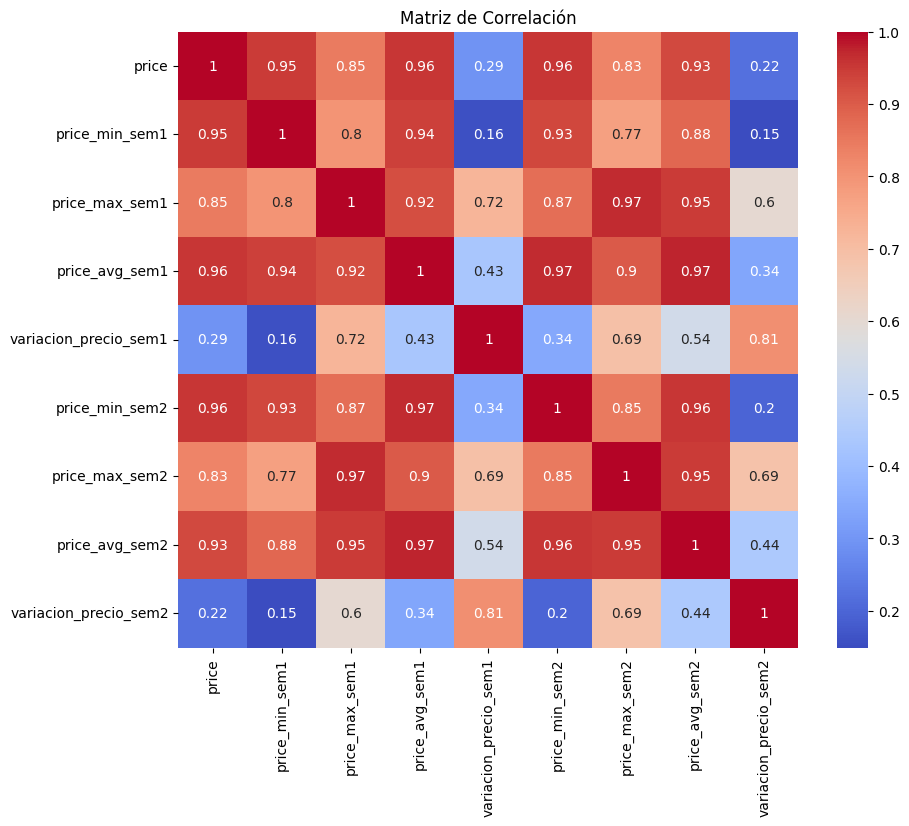

In [303]:
corr_matrix = df[['price', 'price_min_sem1', 'price_max_sem1', 'price_avg_sem1', 'variacion_precio_sem1', 'price_min_sem2', 'price_max_sem2', 'price_avg_sem2', 'variacion_precio_sem2' ]].corr()
# Visualiza el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

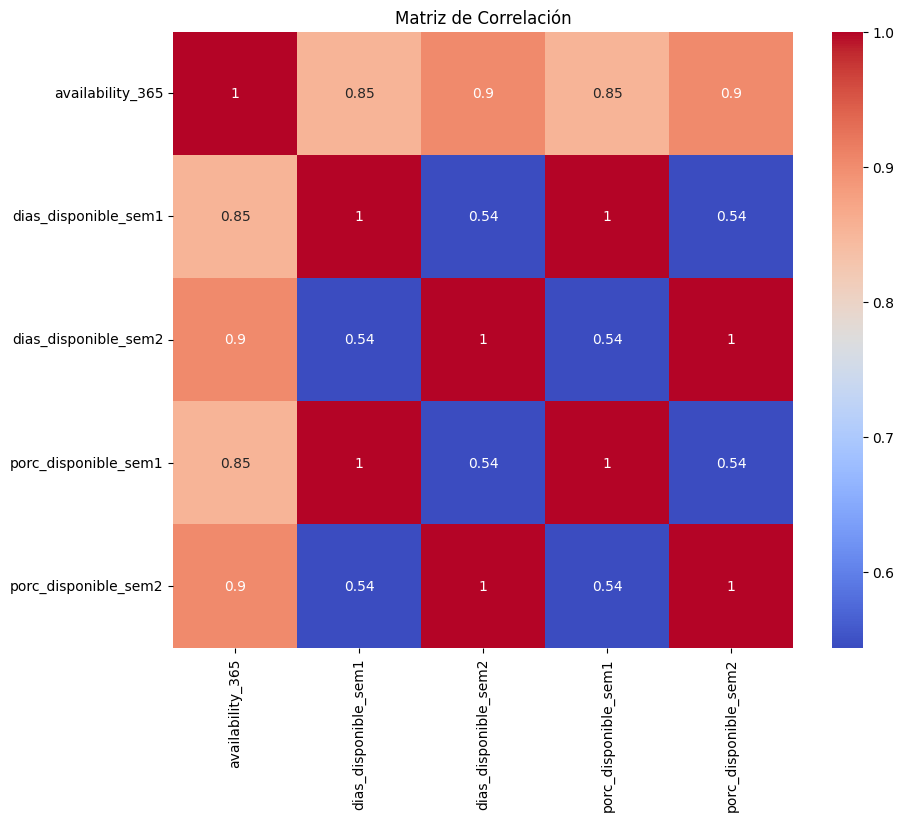

In [304]:
corr_matrix = df[['availability_365', 'dias_disponible_sem1', 'dias_disponible_sem2', 'porc_disponible_sem1', 'porc_disponible_sem2' ]].corr()
# Visualiza el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

**Finally**, the variables 'amenities', 'neighbourhood', 'price_min_sem1', 'price_max_sem1', 'price_avg_sem1', 'price_min_sem2', 'price_max_sem2', and 'price_avg_sem2' are removed.

With this resulting dataset, the subsequent questions and analyses will be conducted.

In [305]:
df.drop(['amenities', 'neighbourhood', 'price_min_sem1', 'price_max_sem1', 'price_avg_sem1','price_min_sem2', 'price_max_sem2', 'price_avg_sem2',], axis = 1, inplace = True)

In [306]:
df['bedrooms'] = df['bedrooms'].fillna(1) 
df['bathrooms'] = df['bathrooms'].fillna(1) 
df['variacion_precio_sem1'] = df['variacion_precio_sem1'].fillna(0) 
df['variacion_precio_sem2'] = df['variacion_precio_sem2'].fillna(0)
df['densidad'] = df['densidad'].fillna('sin_info')

In [307]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: math.ceil(x))

In [308]:
df.head(5)

,id,price,accommodates,bedrooms,bathrooms,cancellation_policy,room_type,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,review_scores_location,availability_365,dias_disponible_sem1,porc_disponible_sem1,variacion_precio_sem1,dias_disponible_sem2,porc_disponible_sem2,variacion_precio_sem2,amenities_count,densidad
0,241032,85.0,4,1.0,1,moderate,Entire home/apt,95.0,10.0,10.0,...,9.0,346,162,0.895028,0.0,184,1.000000,0.0,10,densidad_alta
1,953595,150.0,4,1.0,1,strict,Entire home/apt,96.0,10.0,10.0,...,10.0,291,107,0.591160,314.0,184,1.000000,233.0,16,densidad_alta
2,3308979,975.0,11,5.0,5,strict,Entire home/apt,97.0,10.0,10.0,...,10.0,220,36,0.198895,475.0,184,1.000000,975.0,21,densidad_alta
3,7421966,100.0,3,0.0,1,flexible,Entire home/apt,NaN,NaN,NaN,...,NaN,143,2,0.011050,0.0,141,0.766304,0.0,14,densidad_alta
4,278830,450.0,6,3.0,2,strict,Entire home/apt,92.0,9.0,9.0,...,9.0,365,181,1.000000,150.0,184,1.000000,25.0,13,densidad_alta


## Questions solution

1. What is the correlation between accommodation prices and factors such as location, size, capacity, amenities offered, among others?

To address our first question, we will follow these steps in analyzing the dataset:

Price distribution: We will investigate the distribution of prices to understand how they are spread across the dataset.

Exploratory analysis of variables: We will explore the variables "bedrooms," "accommodates," "bathrooms," "density," and "amenities count." We will analyze their distributions, descriptive statistics, and potential relationships with price.

Correlation matrix with respect to price: We will calculate the correlation matrix between all variables and price. We will examine the correlations to identify possible influences and significant relationships with price.

With these analyses, we aim to gain insights into the price distribution and explore how the variables "bedrooms," "accommodates," "bathrooms," "density," and "amenities count" relate to price within the dataset.

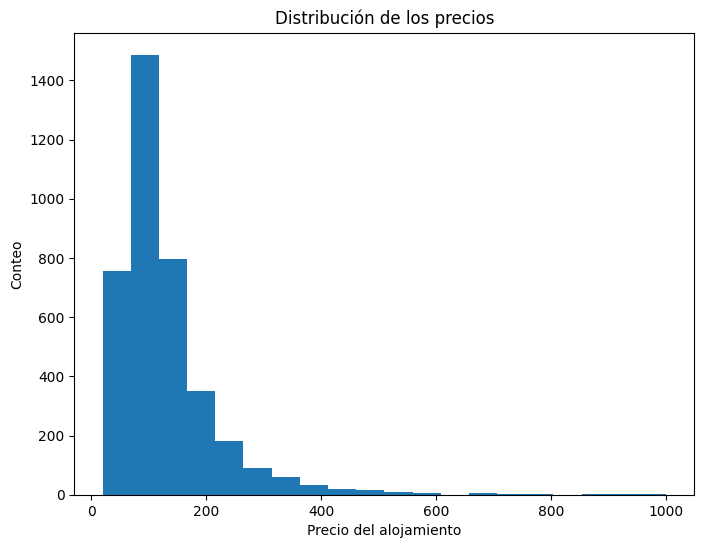

In [309]:
# Análisis exploratorio de datos y visualización
# Graficar la relación entre el precio y el tamaño del espacio
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins = 20)
plt.ylabel('Conteo')
plt.xlabel('Precio del alojamiento')
plt.title('Distribución de los precios')
plt.show()

In [310]:
resumen = pd.DataFrame(df['price'].describe())
resumen

,price
count,3818.000000
mean,127.976166
std,90.250022
min,20.000000
25%,75.000000
50%,100.000000
75%,150.000000
max,1000.000000


### Remark


The average price of accommodations in Seattle is approximately $\$128$ USD, with significant variability in prices (standard deviation of $\$90.25$). Most accommodations have affordable prices, with $50\%$ of them priced below $\$100$ USD. However, there are also more luxurious options available, with a maximum price of $\$1000$ USD.



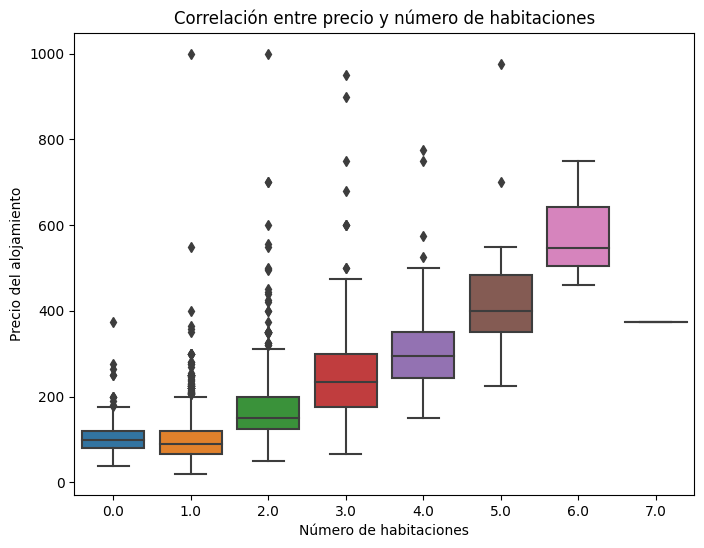

In [311]:
# Análisis exploratorio de datos y visualización
# Graficar la relación entre el precio y el tamaño del espacio
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio del alojamiento')
plt.title('Correlación entre precio y número de habitaciones')
plt.show()

In [312]:
df.groupby('bedrooms').agg({'price':['mean', 'std', 'count' ]}).sort_values(('price','mean'))

price                  
                mean         std count
bedrooms                              
1.0        95.750310   49.463513  2423
0.0       103.548387   35.527983   372
2.0       174.062500   86.313088   640
3.0       249.530035  119.819286   283
4.0       313.695652  122.384676    69
7.0       375.000000         NaN     1
5.0       441.000000  150.149491    24
6.0       578.166667  111.278779     6

### Remark
The number of bedrooms in an accommodation in Seattle is related to the price charged. In general, it is observed that as the number of bedrooms increases, the average price also tends to increase. For example, accommodations with 1 bedroom have an average price of around $\$96$ USD, while those with 6 bedrooms have a higher average price of approximately $\$578$ USD. This pattern suggests that the size and capacity of the accommodation influence the expected price to be paid.

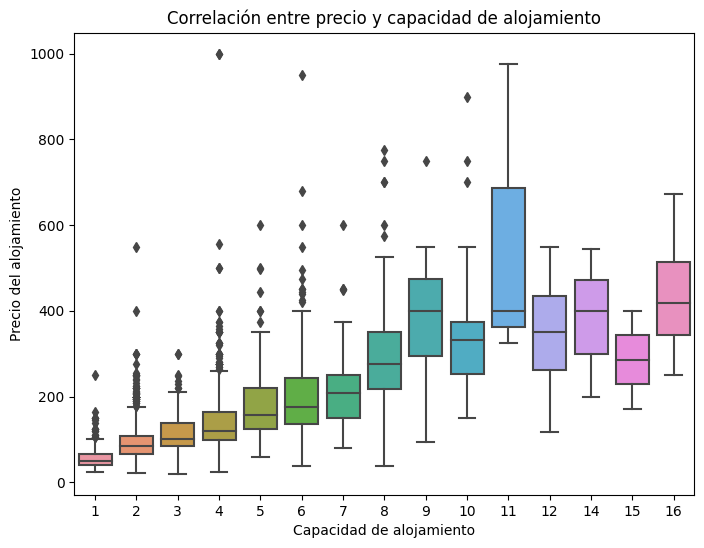

In [313]:
# Graficar la relación entre el precio y el tamaño del espacio
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='accommodates', y='price')
plt.xlabel('Capacidad de alojamiento')
plt.ylabel('Precio del alojamiento')
plt.title('Correlación entre precio y capacidad de alojamiento')
plt.show()

In [314]:
df.groupby('accommodates').agg({'price':['mean', 'std', 'count' ]}).sort_values(('price','mean'))

price                  
                    mean         std count
accommodates                              
1              58.375000   28.285796   256
2              91.296865   40.711565  1627
3             111.600503   42.303732   398
4             140.273885   76.898572   785
5             181.804348   85.051542   184
6             198.572289   98.441254   332
7             220.788462  106.029470    52
15            286.000000  161.220346     2
8             295.478992  133.079296   119
12            345.666667  124.633558    15
10            362.640000  182.856702    25
14            381.333333  173.177173     3
9             396.153846  167.221832    13
16            439.750000  178.002575     4
11            566.666667  355.609805     3

### Remark 


The accommodation capacity has a relationship with the price in Seattle. It is observed that as the accommodation capacity increases, the average price also tends to increase. For example, accommodations for 1 person have an average price of around $\$58$ USD, while those with a capacity of 11 people have a higher average price of approximately $\$567$ USD. This pattern suggests that the accommodation capacity influences the expected price to be paid, as larger accommodations tend to be more expensive. However, it is important to note that as the accommodation capacity increases, the availability of listings decreases.

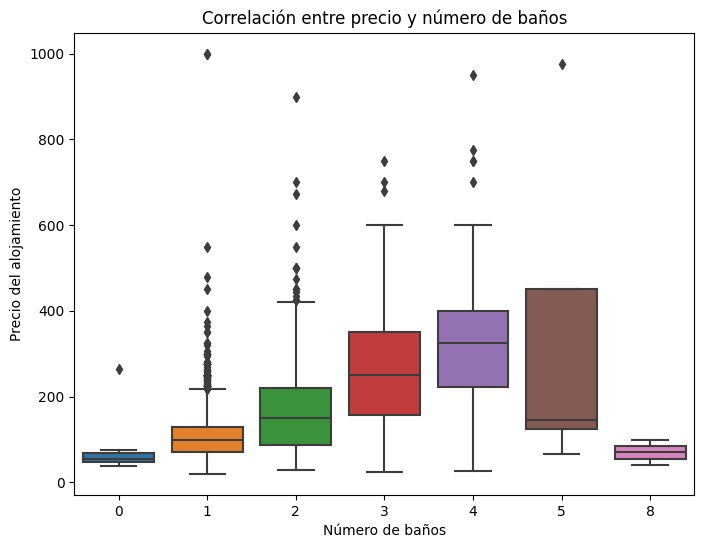

In [177]:
# Graficar la relación entre el precio y el número de baños
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bathrooms', y='price')
plt.xlabel('Número de baños')
plt.ylabel('Precio del alojamiento')
plt.title('Correlación entre precio y número de baños')
plt.show()

In [178]:
df.groupby('bathrooms').agg({'price':['mean', 'std', 'count' ]}).sort_values(('price','mean'))

price                  
                 mean         std count
bathrooms                              
8           70.000000   41.012193     2
0           80.375000   75.581437     8
1          106.395698   55.308284  2929
2          167.106280  105.152063   621
3          263.069149  138.405166   188
4          326.261538  197.719915    65
5          352.000000  378.972295     5

### Remark

The number of bathrooms in an accommodation is also related to the price in Seattle. In general, it is observed that as the number of bathrooms increases, the average price tends to increase. For example, accommodations with 1 bathroom have an average price of around $\$106$ USD units, while those with 5 bathrooms have a higher average price of approximately $\$352$ USD. This indicates that the number of bathrooms is a factor that influences the accommodation price.

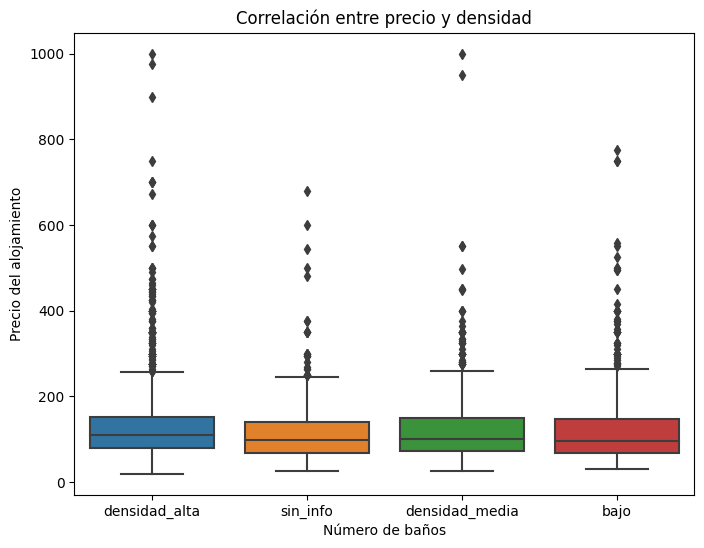

In [316]:
# Graficar la relación entre el precio y el número de baños
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='densidad', y='price')
plt.xlabel('Número de baños')
plt.ylabel('Precio del alojamiento')
plt.title('Correlación entre precio y densidad')
plt.show()

In [180]:
df.groupby('densidad').agg({'price':['mean', 'std', 'count' ]}).sort_values(('price','mean'))

price                 
                      mean        std count
densidad                                   
sin_info        117.286058  81.325124   416
bajo            120.808749  86.060416   983
densidad_media  126.368010  88.830530   769
densidad_alta   135.690909  94.780421  1650

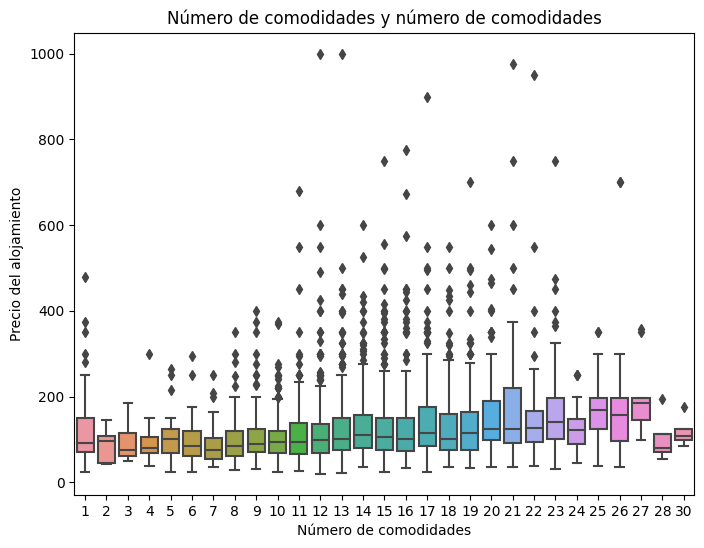

In [317]:
# Graficar la relación entre el precio y el número comodidades
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='amenities_count', y='price')
plt.xlabel('Número de comodidades')
plt.ylabel('Precio del alojamiento')
plt.title('Número de comodidades y número de comodidades')
plt.show()

In [182]:
df.groupby('amenities_count').agg({'price':['mean', 'std', 'count' ]}).sort_values(('price','mean'))

price                  
                       mean         std count
amenities_count                              
7                 86.481013   41.607710    79
2                 87.800000   43.734426     5
3                 92.909091   43.479776    11
6                 96.672727   50.191505    55
8                 97.723577   54.724991   123
4                100.000000   58.518160    17
28               102.500000   62.915287     4
10               104.362319   56.061765   207
5                108.750000   59.530957    24
9                109.854015   63.762604   137
11               110.749077   73.303553   271
12               117.973988   89.696053   346
30               118.250000   39.390143     4
24               124.153846   51.638693    39
13               125.338150   92.224104   346
1                126.978261   96.024879    46
18               129.919811   84.937435   212
14               129.942029   77.981454   345
15               131.267030   88.148531   367
16               133.407692  101.432572   260
19               138.451613   95.753458   186
17               141.512545   97.501258   279
22               150.892857  119.175988    84
20               159.580645  104.056824   124
23               168.666667  113.107083    78
25               170.131579   68.093406    38
21               177.725275  150.368293    91
26               185.600000  156.458786    30
27               196.200000   90.347231    10

#### Remark 

The number of amenities offered in an accommodation is also related to the price in Seattle. As the number of amenities increases, the average price tends to increase. For example, accommodations that offer 7 amenities have an average price of around $\$86$ USD, while those that offer 27 amenities have a higher average price of approximately $\$196$ USD units. This suggests that the number of amenities available in an accommodation influences its price.

In [183]:
# Calcular la correlación entre variables
correlation_matrix = df[['price', 'accommodates', 'bedrooms', 'bathrooms', 'amenities_count']].corr()
correlation_matrix

,price,accommodates,bedrooms,bathrooms,amenities_count
price,1.000000,0.652218,0.627624,0.504291,0.184176
accommodates,0.652218,1.000000,0.770617,0.519709,0.270891
bedrooms,0.627624,0.770617,1.000000,0.603380,0.175237
bathrooms,0.504291,0.519709,0.603380,1.000000,0.136131
amenities_count,0.184176,0.270891,0.175237,0.136131,1.000000


# Conclusion

There is a positive correlation between the price of accommodations and factors such as the size of the space (number of bedrooms and bathrooms) and the accommodation capacity. The strongest correlation is observed between price and accommodation capacity, followed by the correlation with the size of the space. This indicates that, in general, as the size of the space and the accommodation capacity increase, the price tends to be higher.

On the other hand, the correlation between price and the number of amenities offered is relatively low, suggesting that the amenities offered do not have a significant influence on the price of accommodations. However, it is important to note that this correlation is based on the analyzed data and there may be other unconsidered factors that also affect the price.

In conclusion, the location, size of the space, and accommodation capacity are important factors to consider when determining the price of accommodations in Seattle.

2. What are the key factors that influence the review scores given by guests to the listings?

The plan of action for developing the second question:

* **Variables**: We will analyze the influence of the following variables on the review scores given by guests: 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_value', and 'review_scores_location'.

* **Missing values**: It is important to note that these variables have missing values. However, we will still use the available data for analysis. This is justified because even though there are missing values, analyzing the correlation with the available data can still provide valuable insights and help us draw reliable conclusions.

* **Correlation analysis**: We will focus on the variable 'review_scores_value' and examine its correlation with the other variables mentioned above. By analyzing the correlation matrix, we can identify the key factors that have a significant influence on the review scores given by guests. This will allow us to determine which aspects of the listings are most important in terms of guest satisfaction and perception.

By following this plan of action, we can gain insights into the key factors that influence the review scores given by guests to the listings, even with the presence of missing values.

In [184]:
scores = ['review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_value',
       'review_scores_location']

df_scores = df[scores]

In [242]:
df_scores.describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_value,review_scores_location
count,3160.000000,3165.000000,3167.000000,3162.000000,3163.000000
mean,9.636392,9.556398,9.809599,9.452245,9.608916
std,0.698031,0.797274,0.568211,0.750259,0.629053
min,2.000000,3.000000,2.000000,2.000000,4.000000
25%,9.000000,9.000000,10.000000,9.000000,9.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [185]:
df_scores.isna().sum()/df_scores.shape[0]

review_scores_accuracy         0.172342
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_value            0.171818
review_scores_location         0.171556
dtype: float64

In [186]:
corr_matrix = df_scores.corr()

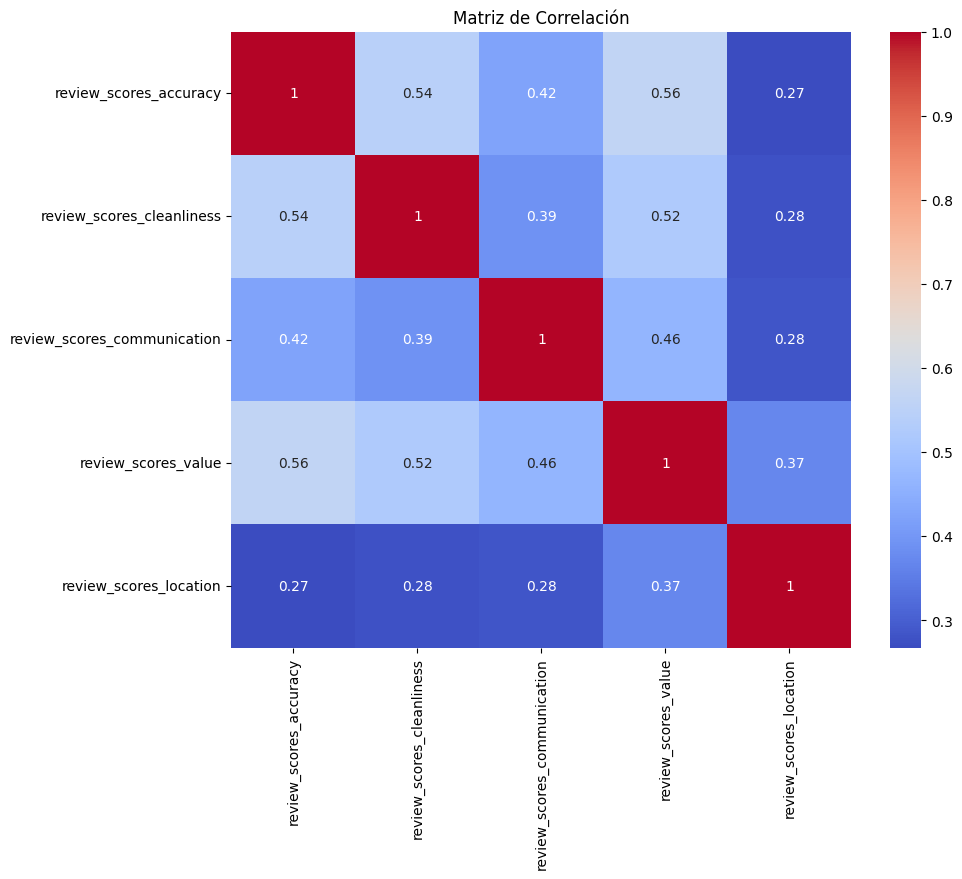

In [187]:
# Visualiza el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Conclusion

The correlation between the review scores is as follows:

1. There is a moderate positive correlation between the accuracy score and the cleanliness score $(0.54)$, communication score $(0.42)$, value score $(0.56)$, and location score $(0.26)$. This indicates that hosts who receive high accuracy scores tend to also receive high scores in these other aspects.

2. There is a moderate positive correlation between the cleanliness score and the communication score $(0.38)$, value score $(0.52)$, and location score $(0.27)$. This suggests that hosts who maintain clean accommodations tend to have good communication, offer good value, and are located in favorable areas.

3. There is a moderate positive correlation between the communication score and the value score $(0.46)$. This indicates that hosts who effectively communicate with their guests also provide good value in relation to the price paid.

4. The location score shows a moderate positive correlation with the value score $(0.36)$. This suggests that well-located accommodations tend to offer good value to guests.

In summary, the review scores are positively correlated, indicating that hosts who excel in one aspect tend to excel in other aspects as well. Accuracy, cleanliness, communication, value, and location are key factors influencing the overall rating of hosts.

3.  What is the expected review score for listings without an assigned score, and how reliable is the estimation?

### Solution

The process to answer the question is as follows:

1. **Variable selection**: Relevant variables are chosen based on prior experience.
2. **Missing value imputation**: For score variables like "review_scores_accuracy" and "review_scores_cleanliness" with missing values, imputation is performed using the average based on grouping "room_type" and "accommodates," excluding the review score to be estimated.
3.**Dataset split**: The dataset is divided into two sets, one containing records with non-null review scores and the other for estimating the "review_scores_value."
4. **Treatment of categorical variables**: Dummy variable encoding is applied to categorical variables like "cancellation_policy," "density," and "room_type," dropping the first dummy column to avoid multicollinearity.
5. **Regression model**: A regression model is built with "review_scores_value" as the target variable. StandardScaler is used for feature scaling, and multiple models are trained. The best model is selected based on metrics such as $R^2$ and $RMSE$.
6. **Estimation evaluation**: The reliability of the estimation is assessed using performance metrics from the chosen model.

In conclusion, this process aims to estimate the expected review score for listings without an assigned score. The reliability of the estimation is evaluated using selected performance metrics.


In [244]:
vars = ['price', 'accommodates', 'bedrooms', 'bathrooms', 'cancellation_policy', 'room_type', 'review_scores_rating',  'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_value','review_scores_location', 'availability_365', 'variacion_precio_sem1', 'variacion_precio_sem2', 'amenities_count', 'densidad']

In [245]:
df1 = df[vars]

In [246]:
df1['review_scores_accuracy_filled'] = df1.groupby(['room_type', 'accommodates'])['review_scores_accuracy'].transform(lambda x: x.fillna(x.mean()))
df1['review_scores_cleanliness_filled'] = df1.groupby(['room_type', 'accommodates'])['review_scores_cleanliness'].transform(lambda x: x.fillna(x.mean()))
df1['review_scores_rating_filled'] = df1.groupby(['room_type', 'accommodates'])['review_scores_rating'].transform(lambda x: x.fillna(x.mean()))
df1['review_scores_communication_filled'] = df1.groupby(['room_type', 'accommodates'])['review_scores_communication'].transform(lambda x: x.fillna(x.mean()))
df1['review_scores_location_filled'] = df1.groupby(['room_type', 'accommodates'])['review_scores_location'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-246-fb838435e687>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review_scores_accuracy_filled'] = df1.groupby(['room_type', 'accommodates'])['review_scores_accuracy'].transform(lambda x: x.fillna(x.mean()))
<ipython-input-246-fb838435e687>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review_scores_cleanliness_filled'] = df1.groupby(['room_type', 'accommodates'])['review_scores_cleanliness'].transform(lambda x: x.fillna(x.mean()))
<ipython-input-246-fb838435e687>:3: SettingWit

In [247]:
df1.drop(['review_scores_rating',  'review_scores_accuracy', 'review_scores_cleanliness','review_scores_communication','review_scores_location'], axis = 1, inplace = True)

In [248]:
df1.isna().sum()

price                                   0
accommodates                            0
bedrooms                                0
bathrooms                               0
cancellation_policy                     0
room_type                               0
review_scores_value                   656
availability_365                        0
variacion_precio_sem1                   0
variacion_precio_sem2                   0
amenities_count                         0
densidad                                0
review_scores_accuracy_filled           0
review_scores_cleanliness_filled        0
review_scores_rating_filled             0
review_scores_communication_filled      0
review_scores_location_filled           0
dtype: int64

In [249]:
# Lista de variables a convertir en variables dummies
variables_dummies = ['cancellation_policy', 'densidad', 'room_type']

# Aplica la conversión a variables dummies eliminando la primera categoría
df_dummies = pd.get_dummies(df1[variables_dummies], drop_first=True)

# Concatena las variables dummies al DataFrame original
df1 = pd.concat([df1, df_dummies], axis=1)

# Elimina las columnas originales
df1.drop(variables_dummies, axis=1, inplace=True)

In [250]:
df_model = df1.query('~ review_scores_value.isna()')
df_estimar = df1.query(' review_scores_value.isna()')

In [251]:
var_x = ['price', 'accommodates', 'bedrooms', 'bathrooms',
       'availability_365', 'variacion_precio_sem1', 'variacion_precio_sem2',
       'amenities_count', 'review_scores_accuracy_filled',
       'review_scores_cleanliness_filled', 'review_scores_rating_filled',
       'review_scores_communication_filled', 'review_scores_location_filled',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'densidad_densidad_alta', 'densidad_densidad_media',
       'densidad_sin_info', 'room_type_Private room', 'room_type_Shared room']

In [252]:
X = df_model[var_x]

y = df_model['review_scores_value']

In [253]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [255]:
# Creación y ajuste del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [256]:
# Predicción de los valores para los registros sin score
y_pred = model.predict(X_test)

In [257]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R2):', r2)

Error cuadrático medio (MSE): 0.29835273989400485
Coeficiente de determinación (R2): 0.48333191721242574


In [258]:
X_estimar = df_estimar[var_x]
X_estimar_scaler = scaler.transform(X_estimar)

In [260]:
print('mean:', model.predict(X_estimar_scaler).mean(), 'max:',model.predict(X_estimar_scaler).max(), 'min:',model.predict(X_estimar_scaler).min())

mean: 9.478455749390402 max: 9.993691433177814 min: 7.981734469207332


In [261]:
coef = pd.DataFrame({'Variable': var_x, 'Coef':model.coef_}).sort_values('Coef')
coef

,Variable,Coef
15,densidad_densidad_alta,-0.079217
0,price,-0.077012
5,variacion_precio_sem1,-0.049415
4,availability_365,-0.029910
17,densidad_sin_info,-0.026332
14,cancellation_policy_strict,-0.017930
16,densidad_densidad_media,-0.017128
13,cancellation_policy_moderate,-0.013767
7,amenities_count,0.001162
3,bathrooms,0.003240


In [262]:
X_filtered = df_model[['bedrooms', 'review_scores_accuracy_filled',
       'review_scores_cleanliness_filled', 'review_scores_rating_filled',
       'review_scores_communication_filled', 'review_scores_location_filled']]

In [263]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [265]:
# Creación y ajuste del modelo de regresión lineal
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [266]:
# Predicción de los valores para los registros sin score
y_pred = model2.predict(X_test)

In [267]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = model2.score(X_test, y_test)

print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R2):', r2)

Error cuadrático medio (MSE): 0.30147789332369734
Coeficiente de determinación (R2): 0.47791997753488213


In [268]:
X_estimar = df_estimar[['bedrooms', 'review_scores_accuracy_filled',
       'review_scores_cleanliness_filled', 'review_scores_rating_filled',
       'review_scores_communication_filled', 'review_scores_location_filled']]

In [269]:
X_estimar_scaler = scaler.transform(X_estimar)

In [270]:
print('mean:', model2.predict(X_estimar_scaler).mean(), 'max:',model2.predict(X_estimar_scaler).max(), 'min:',model2.predict(X_estimar_scaler).min())

mean: 9.447350049991456 max: 9.901933492509643 min: 7.821843108572441


# Results and Conclusions:

Several linear regression models were trained, and the following metrics were obtained for two of the models:

* Model 1:
Mean Squared Error (MSE): 0.29835273989400485
Coefficient of Determination (R2): 0.48333191721242574

* Model 2:
Mean Squared Error (MSE): 0.30147789332369734
Coefficient of Determination (R2): 0.47791997753488213

For the **Model 1**, the variables 'price', 'accommodates', 'bedrooms', 'bathrooms', 'availability_365', 'variacion_precio_sem1', 'variacion_precio_sem2', 'amenities_count', 'review_scores_accuracy_filled', 'review_scores_cleanliness_filled', 'review_scores_rating_filled', 'review_scores_communication_filled', 'review_scores_location_filled', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'densidad_densidad_alta', 'densidad_densidad_media', 'densidad_sin_info', 'room_type_Private room', and 'room_type_Shared room' were used.

The second model considered the five most significant variables based on their coefficients. These variables are as follows:

| Variable |  coeficiente |
|:-----------:|:-----------:|
| review_scores_rating_filled   | 0.339950  |
| review_scores_accuracy_filled  | 0.124079  |
| review_scores_location_filled  | 0.094497  |
| review_scores_communication_filled  | 0.066586  |
| review_scores_cleanliness_filled  | 0.051425  |
| bedrooms  | 0.048369 |


The coefficients indicate the strength and direction of the relationship between the variables and the review_scores_value.

Additionally, **Model 2** was trained using the six variables with the highest coefficients


The estimated review score ranges for both models were found to be consistent, with Model 1 having a:
1. mean score of 9.478455749390402.
2. maximum of 9.993691433177814
3. minimum of 7.981734469207332. 

With Model 2:  
1. mean score of 9.447350049991456
2. maximum of 9.901933492509643
3. minimum of 7.821843108572441.

It is important to note that while the estimated score ranges are consistent, there is room for improvement in the models. Further refinement and exploration of additional variables could lead to more accurate estimations.

In conclusion, the models provide estimations for the review_scores_value, and the ranges of the estimated scores are consistent. However, there is potential for improvement, and further analysis and inclusion of other relevant variables may enhance the accuracy of the estimations.